# Semi-Automated Embracing Approach Workflow

This notebook provides the workflow within all the steps that compose the Semi-Automated Embracing Approach for (Privacy) Threat Modelling.

#### Setup

Run the following cells before starting with your analysis.

*Remember to install dependencies only once, so just comment the cell after executed. On the other hand, module imports need to be done on each run.*.

In [1]:
#!pip install -r requirements.txt

In [2]:
import matplotlib
import pandas
from ipywidgets import widgets
from itables import init_notebook_mode
from embracing import step1, step2, step3, synset_relations

init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

### Preliminary Threats Upload

Please upload the preliminary threats list in CSV format (suggested path: `./data/<file>.csv`).
Once the file has been uploaded, you can proceed and run the next cell within the correct path.

Remember to perform this operation whenever the list of preliminary threats changes, as it is an expensive operation.

*In the case you want to run the same experiment, consider to comment the second line to avoid the similarity score computation to be repeated.*

In [3]:
threat_list_path = f'./data/preliminary_threats.csv'  # CHANGE ME!
#min_score, max_score = step1(threat_list_path)

##### Cardinality k>2

After the semantic similarity scores have been computed thanks to the function `step1`, you can compute the scores for tuples with cardinality k>2 by executing the script `ss_scores_by_groups.py` externally to this notebook. You should adjust the `k` variable within such a script to set the desired cardinality.

#### Load Computed Semantic Similarity Scores

This is the first step to be considered as starting point, as we can assume the preliminary threats upload is carried out once.

In [4]:
ss_scores_df = pandas.read_csv(f'{threat_list_path.split(".csv")[0]}_semantic_similarity_scores.csv')
if 'min_score' not in globals() or 'max_score' not in globals():
    min_score, max_score = ss_scores_df['score'].round(2).min(), ss_scores_df['score'].round(2).max()
print(f'Total number of preliminary threats submitted: {len(ss_scores_df.index)}')

Total number of preliminary threats submitted: 4465


#### Statistics and Plots

Here are some relevant statitics and plots to provide an overview of the computed semantic similarity scores.

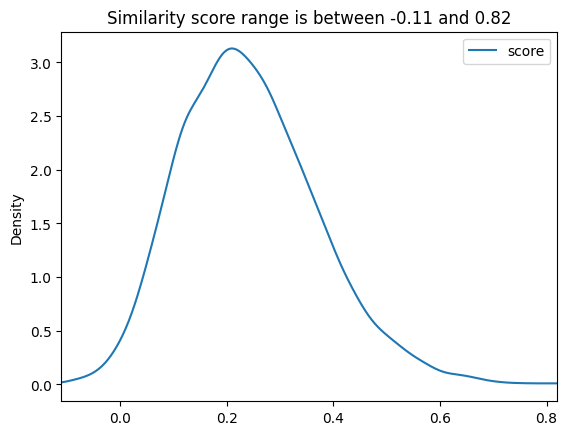

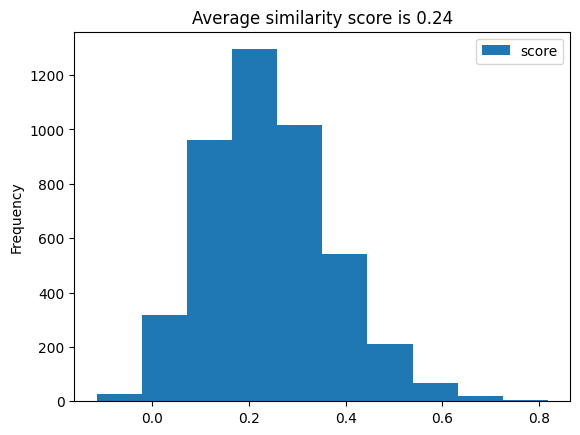

In [5]:
density_plot = ss_scores_df.plot.density(title=f'Similarity score range is between {min_score} and {max_score}')
density_plot.set_xlim(min_score, max_score)
hist_plot = ss_scores_df.plot.hist(title=f'Average similarity score is {ss_scores_df["score"].mean().round(2)}')

### Set Semantic Similarity Score Threshold

Please set your desirable semantic similarity score threshold by running the following cell.

In [6]:
ss_threshold = widgets.FloatSlider(value=0.66,min=min_score, max=max_score, step=0.01, description='threshold:', readout_format='.2f')
ss_threshold

FloatSlider(value=0.66, description='threshold:', max=0.82, min=-0.11, step=0.01)

### Threat Pairs Inspection

Now you are able to further investigate all the threat pairs with a score equal or greater to such a threshold. To display the table, please run the following cell.

In [7]:
embraceable_candidates = step2(f'{threat_list_path.split(".csv")[0]}_semantic_similarity_scores.csv', ss_threshold.value)
print(f'The list of embraceable candidates above the threshold {round(ss_threshold.value, 2)} contains {len(embraceable_candidates)} pairs.')
embraceable_candidates

The list of embraceable candidates above the threshold 0.66 contains 15 pairs.


sentence1   
1519              Software vulnerabilities exploitation  \
1839  Unintentional change of data or car components...   
1961                                Information leakage   
2515  Attacker remotely accesses via telematics syst...   
2587  An adversary can capture, analyze, and replaye...   
2646  An adversary could link the messages to a spec...   
2649  An adversary could link the messages to a spec...   
2758  An adversary can execute arbitrary code on the...   
2759  An adversary can execute arbitrary code on the...   
2760  An adversary can execute arbitrary code on the...   
3480                                Mobile App spoofing   
3876                                 V2X data tampering   
4023                              Insecure API endpoint   
4352  Non-transparent Policies, Agreements, Terms an...   
4431                     Sharing of Data with 3rd Party   

                                              sentence2     score  
1519                    Web Application Vulnerabilities  0.705395  
1839   Erroneous use or configuration of car components  0.766479  
1961                        Operator-sided Data Leakage  0.711944  
2515  An adversary can execute arbitrary code on the...  0.814812  
2587  For wireless communication channel, messages c...  0.667772  
2646  An adversary can identify or track the vehicle...  0.818624  
2649  An adversary relates pseudonymous positions to...  0.705839  
2758  An attacker changes circuits of a device to ex...  0.683586  
2759  Attacker operates phisically on the TC by tamp...  0.693854  
2760  An attacker could perform remote control by in...  0.738687  
3480                                 Mobile App malware  0.758532  
3876                                  V2X eavesdropping  0.679367  
4023                             Insecure Data Transfer  0.669211  
4352       Inappropriate Policies, Terms and Conditions  0.666409  
4431           Transfer or Processing through 3rd Party  0.813606

You can alternatively analyse only the rows where a specific threat is present. Just specify the threat label and run the cell below.

In [8]:
lookup_threat = 'Information leakage'  # CHANGE ME!
embraceable_candidates.iloc[(embraceable_candidates['sentence1'].values==lookup_threat) | (embraceable_candidates['sentence2'].values==lookup_threat)]

sentence1                    sentence2     score
1961  Information leakage  Operator-sided Data Leakage  0.711944

Once you identified a row of interest, specify the index of such a row and run the following cell.

In [9]:
# Please specify the index of the pair you want to embrace.
index_to_embrace = 2587  # CHANGE ME!
embraceable_candidates.iloc[embraceable_candidates.index==index_to_embrace]

sentence1   
2587  An adversary can capture, analyze, and replaye...  \

                                              sentence2     score  
2587  For wireless communication channel, messages c...  0.667772

### Synset Relations Among Nouns in Target Threat Pairs

Now that you shifted the focus of the analysis on a specific threat pair, run the following cell to obtain automatically identified (if present) synset relations.

In [10]:
s1 = embraceable_candidates.iloc[embraceable_candidates.index==index_to_embrace]['sentence1'].values[0]
s2 = embraceable_candidates.iloc[embraceable_candidates.index==index_to_embrace]['sentence2'].values[0]
is_partof, is_typeof = step3(s1, s2)
print(f'\nPart of relation(s) found: {is_partof}\tType of relation(s) found: {is_typeof}')

message and communication are not related ("part of")
message is a hyponym of communication
message is a hyponym of communication
message and communication have common hypernyms: communication, abstraction

message and channel are not related ("part of")
message and channel have common hypernyms: move, entity, abstraction


adversary and communication are not related ("part of")
adversary and communication have common hypernyms: entity

adversary and channel are not related ("part of")
adversary and channel have common hypernyms: whole, entity, physical_entity

adversary and message are not related ("part of")
adversary and message have common hypernyms: entity


Part of relation(s) found: False	Type of relation(s) found: True


To support the most appropriate choice of wording/level of detail, run the last cell for an overview of the synset relations related to the nouns identified in both threat labels.

In [11]:
synset_dict1 = synset_relations(embraceable_candidates.iloc[embraceable_candidates.index==index_to_embrace]['sentence1'].values[0])
synset_dict2 = synset_relations(embraceable_candidates.iloc[embraceable_candidates.index==index_to_embrace]['sentence2'].values[0])

focus_df = pandas.concat([pandas.DataFrame.from_dict(synset_dict1['terms']), pandas.DataFrame.from_dict(synset_dict2['terms'])])
focus_df['synonyms'] = focus_df['synonyms'].str.slice(0,3)
focus_df['hypernyms [L1]'] = focus_df['hypernyms [L1]'].str.slice(0,1)
focus_df['hyponyms [L1]'] = focus_df['hyponyms [L1]'].str.slice(0,1)
focus_df['meronyms'] = focus_df['meronyms'].str.slice(0,1)
focus_df['holonyms'] = focus_df['holonyms'].str.slice(0,1)
focus_df

term   
0      Synset('adversary.n.01')  \
1        Synset('message.n.01')   
0  Synset('communication.n.01')   
1        Synset('channel.n.01')   
2        Synset('message.n.01')   

                                            synonyms meronyms holonyms   
0                         [Synset('adversary.n.01')]       []       []  \
1  [Synset('message.n.01'), Synset('message.n.02'...       []       []   
0  [Synset('communication.n.01'), Synset('communi...       []       []   
1  [Synset('channel.n.01'), Synset('channel.n.02'...       []       []   
2  [Synset('message.n.01'), Synset('message.n.02'...       []       []   

                   hypernyms [L1]   
0         [Synset('person.n.01')]  \
1  [Synset('communication.n.02')]   
0            [Synset('act.n.02')]   
1   [Synset('transmission.n.02')]   
2  [Synset('communication.n.02')]   

                                      hypernyms [L2]   
0  [Synset('person.n.01'), Synset('causal_agent.n...  \
1  [Synset('communication.n.02'), Synset('abstrac...   
0         [Synset('act.n.02'), Synset('event.n.01')]   
1  [Synset('transmission.n.02'), Synset('communic...   
2  [Synset('communication.n.02'), Synset('abstrac...   

                                      hypernyms [L3]   
0  [Synset('person.n.01'), Synset('causal_agent.n...  \
1  [Synset('communication.n.02'), Synset('abstrac...   
0  [Synset('act.n.02'), Synset('event.n.01'), Syn...   
1  [Synset('transmission.n.02'), Synset('communic...   
2  [Synset('communication.n.02'), Synset('abstrac...   

                hyponyms [L1]   
0     [Synset('dueler.n.01')]  \
1  [Synset('broadcast.n.01')]   
0    [Synset('channel.n.05')]   
1                          []   
2  [Synset('broadcast.n.01')]   

                                       hyponyms [L2]   
0  [Synset('dueler.n.01'), Synset('enemy.n.02'), ...  \
1  [Synset('broadcast.n.01'), Synset('cipher.n.01...   
0  [Synset('channel.n.05'), Synset('contact.n.08'...   
1                                                 []   
2  [Synset('broadcast.n.01'), Synset('cipher.n.01...   

                                       hyponyms [L3]  
0  [Synset('dueler.n.01'), Synset('enemy.n.02'), ...  
1  [Synset('broadcast.n.01'), Synset('cipher.n.01...  
0  [Synset('channel.n.05'), Synset('contact.n.08'...  
1                                                 []  
2  [Synset('broadcast.n.01'), Synset('cipher.n.01...

### Threat Tuples Inspection

We can also investigate on potential tuples as candidates to be embraced within the selected threshold.

#### Cardinality 3


In [12]:
ss_k_3_df = pandas.read_csv('./data/preliminary_threats_ss_scores_with_cardinality_3.csv')

In [13]:
ss_k_3_df.loc[ss_k_3_df['mean'] >= 0.66]

max      mean       min   
94801   0.814812  0.669630  0.538301  \
98888   0.814812  0.673325  0.521578   
98889   0.814812  0.690231  0.562028   
98890   0.814812  0.730515  0.638045   
103020  0.818624  0.677128  0.580923   
103021  0.818624  0.701544  0.580169   
106128  0.693854  0.678046  0.656698   
106129  0.738687  0.662146  0.564164   
106181  0.738687  0.693818  0.648913   

                                                   scores   
94801   [0.5383011102676392, 0.6557775735855103, 0.814...  \
98888   [0.8148122429847717, 0.5215775966644287, 0.683...   
98889   [0.8148122429847717, 0.5620277523994446, 0.693...   
98890   [0.8148122429847717, 0.6380448341369629, 0.738...   
103020  [0.8186241984367371, 0.5809226036071777, 0.631...   
103021  [0.8186241984367371, 0.7058390974998474, 0.580...   
106128  [0.6835857033729553, 0.6938542723655701, 0.656...   
106129  [0.6835857033729553, 0.7386872172355652, 0.564...   
106181  [0.6938542723655701, 0.7386872172355652, 0.648...   

                                                sentence1   
94801   Attacker injects CAN messages/codes via any EC...  \
98888   Attacker remotely accesses via telematics syst...   
98889   Attacker remotely accesses via telematics syst...   
98890   Attacker remotely accesses via telematics syst...   
103020  An adversary could link the messages to a spec...   
103021  An adversary could link the messages to a spec...   
106128  An adversary can execute arbitrary code on the...   
106129  An adversary can execute arbitrary code on the...   
106181  An adversary can execute arbitrary code on the...   

                                                sentence2   
94801   Attacker remotely accesses via telematics syst...  \
98888   An adversary can execute arbitrary code on the...   
98889   An adversary can execute arbitrary code on the...   
98890   An adversary can execute arbitrary code on the...   
103020  An adversary can identify or track the vehicle...   
103021  An adversary can identify or track the vehicle...   
106128  An attacker changes circuits of a device to ex...   
106129  An attacker changes circuits of a device to ex...   
106181  Attacker operates phisically on the TC by tamp...   

                                                sentence3  
94801   An adversary can execute arbitrary code on the...  
98888   An attacker changes circuits of a device to ex...  
98889   Attacker operates phisically on the TC by tamp...  
98890   An attacker could perform remote control by in...  
103020  Possibility to discover and control the behavi...  
103021  An adversary relates pseudonymous positions to...  
106128  Attacker operates phisically on the TC by tamp...  
106129  An attacker could perform remote control by in...  
106181  An attacker could perform remote control by in...

You can also find a specific tuple if you are interested in their similarity scores.

In [14]:
s1 = 'Manipulation of hardware and software'
s2 = 'Spying, SMS Interception & Modification, User Tracking.'
s3 = 'Mobile App spoofing'
ss_k_3_df[(ss_k_3_df['sentence1'].isin([s1, s2, s3])) & (ss_k_3_df['sentence2'].isin([s1, s2, s3])) & (ss_k_3_df['sentence3'].isin([s1, s2, s3]))]

max      mean       min   
11250  0.499392  0.445722  0.408568  \

                                                  scores   
11250  [0.4085677862167358, 0.429207980632782, 0.4993...  \

                                   sentence1   
11250  Manipulation of hardware and software  \

                                               sentence2            sentence3  
11250  Spying, SMS Interception & Modification, User ...  Mobile App spoofing

##### Statistics and Plots


Total number of preliminary threats submitted: 138415


(-0.11, 0.82)

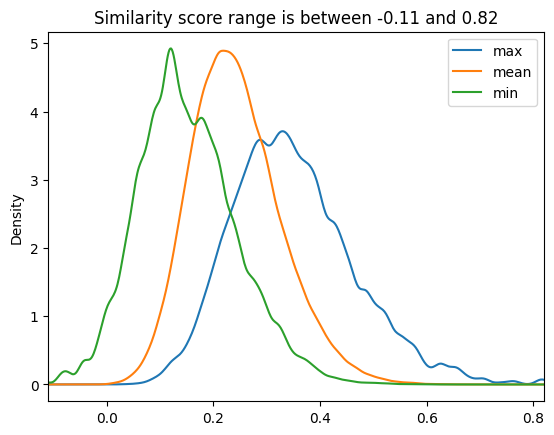

In [15]:
min_score, max_score = ss_k_3_df['min'].round(2).min(), ss_k_3_df['max'].round(2).max()
print(f'Total number of preliminary threats submitted: {len(ss_k_3_df.index)}')

density_plot = ss_k_3_df.plot.density(title=f'Similarity score range is between {min_score} and {max_score}')
density_plot.set_xlim(min_score, max_score)
#hist_plot = ss_k_3_df.plot.hist(title=f'Average similarity score is {ss_k_3_df["mean"].mean().round(2)}')

#### Cardinality 4


In [16]:
ss_k_4_df = pandas.read_csv('./data/preliminary_threats_ss_scores_with_cardinality_4.csv')

In [17]:
ss_k_4_df.loc[ss_k_4_df['mean'] >= 0.66]

max      mean       min   
2593414  0.814812  0.660145  0.521578  \
2593466  0.814812  0.682723  0.562028   
2734471  0.738687  0.664317  0.564164   

                                                    scores   
2593414  [0.8148122429847717, 0.5215775966644287, 0.638...  \
2593466  [0.8148122429847717, 0.5620277523994446, 0.638...   
2734471  [0.6835857033729553, 0.6938542723655701, 0.738...   

                                                 sentence1   
2593414  Attacker remotely accesses via telematics syst...  \
2593466  Attacker remotely accesses via telematics syst...   
2734471  An adversary can execute arbitrary code on the...   

                                                 sentence2   
2593414  An adversary can execute arbitrary code on the...  \
2593466  An adversary can execute arbitrary code on the...   
2734471  An attacker changes circuits of a device to ex...   

                                                 sentence3   
2593414  An attacker changes circuits of a device to ex...  \
2593466  Attacker operates phisically on the TC by tamp...   
2734471  Attacker operates phisically on the TC by tamp...   

                                                 sentence4  
2593414  An attacker could perform remote control by in...  
2593466  An attacker could perform remote control by in...  
2734471  An attacker could perform remote control by in...

You can also find a specific tuple if you are interested in their similarity scores.

In [18]:
s1 = 'Manipulation of hardware and software'
s2 = 'Spying, SMS Interception & Modification, User Tracking.'
s3 = 'Mobile App spoofing'
s4 = 'Infotainment malware'
ss_k_4_df[(ss_k_4_df['sentence1'].isin([s1, s2, s3, s4])) & (ss_k_4_df['sentence2'].isin([s1, s2, s3, s4])) & (ss_k_4_df['sentence3'].isin([s1, s2, s3, s4])) & (ss_k_4_df['sentence4'].isin([s1, s2, s3, s4]))]

max     mean       min   
360684  0.505783  0.42182  0.317915  \

                                                   scores   
360684  [0.4085677862167358, 0.429207980632782, 0.5057...  \

                                    sentence1   
360684  Manipulation of hardware and software  \

                                                sentence2   
360684  Spying, SMS Interception & Modification, User ...  \

                  sentence3             sentence4  
360684  Mobile App spoofing  Infotainment malware

##### Statistics and Plot

Total number of preliminary threats submitted: 3183545


(-0.11, 0.82)

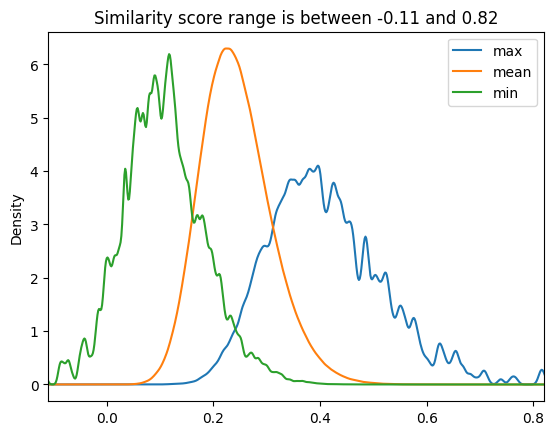

In [19]:
min_score, max_score = ss_k_4_df['min'].round(2).min(), ss_k_4_df['max'].round(2).max()
print(f'Total number of preliminary threats submitted: {len(ss_k_4_df.index)}')

density_plot = ss_k_4_df.plot.density(title=f'Similarity score range is between {min_score} and {max_score}')
density_plot.set_xlim(min_score, max_score)
#hist_plot = ss_k_4_df.plot.hist(title=f'Average similarity score is {ss_k_4_df["mean"].mean().round(2)}')